## Camera Capture

Open camera via linux terminal:

    gst-launch-1.0 -v nvarguscamerasrc ! 'video/x-raw(memory:NVMM), width=1920, height=1080, format=NV12, framerate=30/1' ! nvvidconv flip-method=0 ! 'video/x-raw, width=1920, height=1080, format=BGRx' ! videoconvert ! 'video/x-raw, format=BGR' ! appsink

Available capture settings:
| Width | Height | Framerate | Duration |
|-------|--------|-----------|----------|
|  3264 |   2464 |        21 | 47619048 |
|  3264 |   1848 |        28 | 35714284 |
|  1920 |   1080 |        30 | 33333334 |
|  1640 |   1232 |        30 | 33333334 |
|  1280 |    720 |        60 | 16666667 |
|  1280 |    720 |       120 |  8333333 |

Other properties:
|                   | Min    | Max         |
|-------------------|--------|-------------|
| Analog Gain Range |    1.0 |      10.625 |
| Exposure Range    | 13 000 | 683 709 000 |

If errors with camera occurring, restart nvargus-daemon:

    sudo systemctl restart nvargus-daemon

In [1]:
import cv2
import matplotlib.pyplot as plt

def gstreamer_pipeline(
    raw_width=1640,
    raw_height=1232,
    out_width=340,
    out_height=256,
    framerate=10,
    flip_method=2
):
    return (
        "nvarguscamerasrc"
        " ! video/x-raw(memory:NVMM), width=(int){:d}, height=(int){:d}, format=(string)NV12, framerate=(fraction){:d}/1"
        " ! nvvidconv flip-method={:d}"
        " ! video/x-raw, width=(int){:d}, height=(int){:d}, format=(string)BGRx"
        " ! videoconvert"
        " ! video/x-raw, format=(string)BGR"
        " ! appsink"
        .format(
            raw_width,
            raw_height,
            framerate,
            flip_method,
            out_width,
            out_height,
        )
    )

print(gstreamer_pipeline())

nvarguscamerasrc ! video/x-raw(memory:NVMM), width=(int)1640, height=(int)1232, format=(string)NV12, framerate=(fraction)10/1 ! nvvidconv flip-method=2 ! video/x-raw, width=(int)340, height=(int)256, format=(string)BGRx ! videoconvert ! video/x-raw, format=(string)BGR ! appsink


GST_ARGUS: Creating output stream
CONSUMER: Waiting until producer is connected...
GST_ARGUS: Available Sensor modes :
GST_ARGUS: 3264 x 2464 FR = 21.000000 fps Duration = 47619048 ; Analog Gain range min 1.000000, max 10.625000; Exposure Range min 13000, max 683709000;

GST_ARGUS: 3264 x 1848 FR = 28.000001 fps Duration = 35714284 ; Analog Gain range min 1.000000, max 10.625000; Exposure Range min 13000, max 683709000;

GST_ARGUS: 1920 x 1080 FR = 29.999999 fps Duration = 33333334 ; Analog Gain range min 1.000000, max 10.625000; Exposure Range min 13000, max 683709000;

GST_ARGUS: 1640 x 1232 FR = 29.999999 fps Duration = 33333334 ; Analog Gain range min 1.000000, max 10.625000; Exposure Range min 13000, max 683709000;

GST_ARGUS: 1280 x 720 FR = 59.999999 fps Duration = 16666667 ; Analog Gain range min 1.000000, max 10.625000; Exposure Range min 13000, max 683709000;

GST_ARGUS: 1280 x 720 FR = 120.000005 fps Duration = 8333333 ; Analog Gain range min 1.000000, max 10.625000; Exposur

[ WARN:0@28.230] global /home/mt19029/opencv/modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


GST_ARGUS: Cleaning up
CONSUMER: Done Success
GST_ARGUS: Done Success
image.shape = (256, 340, 3)


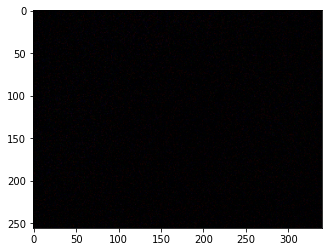

In [2]:
# open pipeline
cap = cv2.VideoCapture(gstreamer_pipeline(), cv2.CAP_GSTREAMER)

if cap.isOpened():
    # make image
    ret_val, image = cap.read() 
    cap.release()

    # show image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print("image.shape =", image.shape)
    plt.imshow(image)
    plt.show()
else:
    raise RuntimeError("camera not available")